In [9]:
!pwd

/content


In [2]:
!nvidia-smi

Sat Apr 30 02:28:26 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
from __future__ import print_function, division
import os
import math
from os.path import join, exists
from keras import callbacks
# local libs
from drive.MyDrive.CVproject.models.suim_net import SUIM_Net
from drive.MyDrive.CVproject.utils.data_utils import trainDataGenerator

In [5]:
## dataset directory
dataset_name = "suim"
train_dir = "/content/drive/MyDrive/CVproject/train_val"

In [6]:
## ckpt directory
ckpt_dir = "drive/MyDrive/CVproject/"
base_ = 'RSB' # or 'VGG'
if base_=='RSB':
    im_res_ = (320, 240, 3)
    ckpt_name = "suimnet_rsb02.hdf5"
else:
    im_res_ = (320, 256, 3)
    ckpt_name = "suimnet_vgg.hdf5"
model_ckpt_name = join(ckpt_dir, ckpt_name)
if not exists(ckpt_dir): os.makedirs(ckpt_dir)

In [41]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [7]:
## initialize model
suimnet = SUIM_Net(base=base_, im_res=im_res_, n_classes=5)
model = suimnet.model
print (model.summary())

Triplet Attention!
ATTENTION!
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 240, 320, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_3 (Conv2D)              (None, 236, 316, 64  4864        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_3 (BatchNo  (None, 236, 316, 64  256        ['conv2d_3[0][0]']               
 rmalization)                   )                               

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


 ormalization)                                                                                    
                                                                                                  
 add_5 (Add)                    (None, 30, 40, 256)  0           ['batch_normalization_23[0][0]', 
                                                                  'activation_15[0][0]']          
                                                                                                  
 activation_18 (Activation)     (None, 30, 40, 256)  0           ['add_5[0][0]']                  
                                                                                                  
 conv2d_24 (Conv2D)             (None, 30, 40, 128)  32896       ['activation_18[0][0]']          
                                                                                                  
 batch_normalization_24 (BatchN  (None, 30, 40, 128)  512        ['conv2d_24[0][0]']              
 ormalizat

In [8]:
!cd ckpt
!ls

/bin/bash: line 0: cd: ckpt: No such file or directory
drive  sample_data


In [8]:
# Desktop/Desktop - MacBook Air/Courses/Computer Vision/Project/SUIMmaster/ckpt
ckpt_dir = 'drive/MyDrive/CVproject/'
model_ckpt_name = join(ckpt_dir, "suimnet_rsb02.hdf5")
model_ckpt_name

'drive/MyDrive/CVproject/suimnet_rsb02.hdf5'

In [9]:
## load saved model
model.load_weights(model_ckpt_name)

In [13]:
print(model.history)

None


In [10]:
batch_size = 4
num_epochs = 40

In [11]:
# setup data generator
data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')

In [12]:
model_checkpoint = callbacks.ModelCheckpoint(model_ckpt_name, 
                                   monitor = 'loss', 
                                   verbose = 1, mode= 'auto',
                                   save_weights_only = True,
                                   save_best_only = True)

In [13]:
# data generator
train_gen = trainDataGenerator(batch_size, # batch_size 
                              train_dir,# train-data dir
                              "images", # image_folder 
                              "masks", # mask_folder
                              data_gen_args, # aug_dict
                              image_color_mode="rgb", 
                              mask_color_mode="rgb",
                              target_size = (im_res_[1], im_res_[0]))

In [ ]:
# img, label = next(train_gen)
# label

In [ ]:
# import matplotlib.pyplot as plt
# for _ in range(1):
#     img, label = next(train_gen)
#     #print(img.shape)   #  (1,256,256,3)
#     plt.imshow(img[0])
#     plt.show()

In [ ]:
# import wandb

# wandb.login()

In [ ]:
# wandb.init(entity = "hamudi", project = "SUIM-Net-pure")

In [21]:
# config = wandb.config
# config.batch_size = 4
# config.epochs = 50

In [22]:
# wandb_callback = wandb.keras.WandbCallback(monitor="accuracy",log_weights=True)

In [ ]:
# with open("drive/MyDrive/CVproject/suim02_iou", "wb") as fp:   #Pickling
#    pickle.dump(suimnet1.history['mean_io_u'], fp)

In [14]:
## fit model
import pickle
suimnet2 = model.fit(train_gen, 
                    steps_per_epoch = 100,
                    epochs = num_epochs,
                    callbacks = [model_checkpoint])



# with open("suim02_iou", "wb") as fp:   #Pickling
#    pickle.dump(suimnet2.history['mean_io_u'], fp)


Found 1525 images belonging to 1 classes.
Found 1525 images belonging to 1 classes.
Epoch 1/40
100/100 [==============================] - ETA: 0s - loss: 0.1819 - accuracy: 0.4040
Epoch 1: loss improved from inf to 0.18192, saving model to drive/MyDrive/CVproject/suimnet_rsb02.hdf5
100/100 [==============================] - 644s 6s/step - loss: 0.1819 - accuracy: 0.4040
Epoch 2/40
100/100 [==============================] - ETA: 0s - loss: 0.1738 - accuracy: 0.3908
Epoch 2: loss improved from 0.18192 to 0.17379, saving model to drive/MyDrive/CVproject/suimnet_rsb02.hdf5
100/100 [==============================] - 626s 6s/step - loss: 0.1738 - accuracy: 0.3908
Epoch 3/40
100/100 [==============================] - ETA: 0s - loss: 0.1861 - accuracy: 0.3803
Epoch 3: loss did not improve from 0.17379
100/100 [==============================] - 629s 6s/step - loss: 0.1861 - accuracy: 0.3803
Epoch 4/40
100/100 [==============================] - ETA: 0s - loss: 0.1898 - accuracy: 0.3794
Epoch 4: 

In [ ]:
# with open("drive/MyDrive/CVproject/suim02_accuracy", "rb") as fp:   # Unpickling
#    a = pickle.load(fp)
# a.append(suimnet2.history['accuracy'])
# with open("drive/MyDrive/CVproject/suim02_loss", "rb") as fp:   # Unpickling
#    l = pickle.load(fp)
# l.append(suimnet2.history['loss'])

with open("drive/MyDrive/CVproject/suim03_accuracy", "wb") as fp:   #Pickling
   pickle.dump(suimnet1.history['accuracy'], fp)
with open("drive/MyDrive/CVproject/suim03_loss", "wb") as fp:   #Pickling
   pickle.dump(suimnet1.history['loss'], fp)

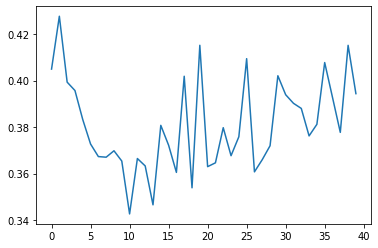

In [48]:
import matplotlib.pyplot as plt
plt.plot(suimnet1.history['accuracy'])

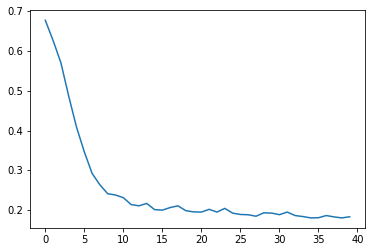

In [49]:
plt.plot(suimnet1.history['loss'])

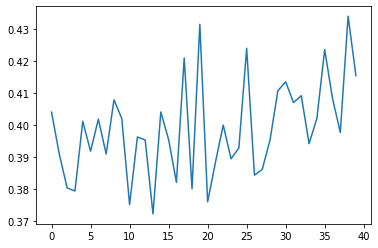

In [15]:
import matplotlib.pyplot as plt
plt.plot(suimnet2.history['accuracy'])

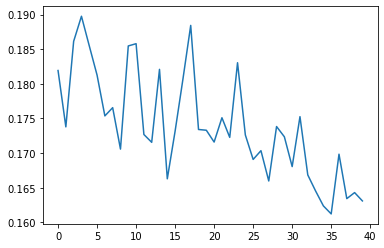

In [16]:
plt.plot(suimnet2.history['loss'])

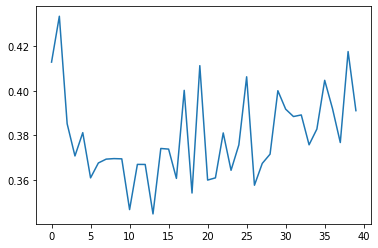

In [11]:
import matplotlib.pyplot as plt
plt.plot(suimnet3.history['accuracy'])

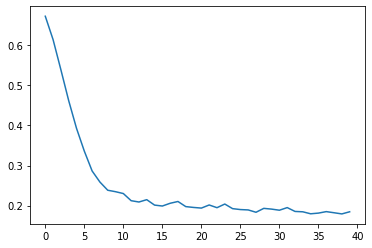

In [12]:
plt.plot(suimnet3.history['loss'])

In [ ]:
# #import os
# #os.environ["TF_DISABLE_MLC"] = "1"
# #os.environ["TF_MLC_LOGGING"] = "1"
# import tensorflow as tf
# from tensorflow.python.compiler.mlcompute import mlcompute

# tf.compat.v1.disable_eager_execution()
# mlcompute.set_mlc_device(device_name='gpu')
# print("is_apple_mlc_enabled %s" % mlcompute.is_apple_mlc_enabled())
# print("is_tf_compiled_with_apple_mlc %s" % mlcompute.is_tf_compiled_with_apple_mlc())
# print(f"eagerly? {tf.executing_eagerly()}")
# print(tf.config.list_logical_devices())

# from tensorflow.keras import datasets, layers, models

# (train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
# train_images, test_images = train_images / 255.0, test_images / 255.0
# class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
#                'dog', 'frog', 'horse', 'ship', 'truck']
# model = models.Sequential()
# model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.Flatten())
# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dense(10))
# model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])
# history = model.fit(train_images, train_labels, epochs=10,
#                     validation_data=(test_images, test_labels))

In [ ]:
# import tensorflow_datasets as tfds
# import tensorflow as tf

# from tensorflow.python.framework.ops import disable_eager_execution
# disable_eager_execution()

# (ds_train, ds_test), ds_info = tfds.load(
#     'mnist',
#     split=['train', 'test'],
#     shuffle_files=True,
#     as_supervised=True,
#     with_info=True,
# )

# def normalize_img(image, label):
#   """Normalizes images: `uint8` -> `float32`."""
#   return tf.cast(image, tf.float32) / 255., label

# batch_size = 128

# ds_train = ds_train.map(
#     normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
# ds_train = ds_train.cache()
# ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
# ds_train = ds_train.batch(batch_size)
# ds_train = ds_train.prefetch(tf.data.experimental.AUTOTUNE)


# ds_test = ds_test.map(
#     normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
# ds_test = ds_test.batch(batch_size)
# ds_test = ds_test.cache()
# ds_test = ds_test.prefetch(tf.data.experimental.AUTOTUNE)


# model = tf.keras.models.Sequential([
#   tf.keras.layers.Conv2D(32, kernel_size=(3, 3),
#                  activation='relu'),
#   tf.keras.layers.Conv2D(64, kernel_size=(3, 3),
#                  activation='relu'),
#   tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
# #   tf.keras.layers.Dropout(0.25),
#   tf.keras.layers.Flatten(),
#   tf.keras.layers.Dense(128, activation='relu'),
# #   tf.keras.layers.Dropout(0.5),
#   tf.keras.layers.Dense(10, activation='softmax')
# ])
# model.compile(
#     loss='sparse_categorical_crossentropy',
#     optimizer=tf.keras.optimizers.Adam(0.001),
#     metrics=['accuracy'],
# )

# model.fit(
#     ds_train,
#     epochs=12,
#     validation_data=ds_test,
# )
